In [1]:
import pickle

In [2]:
with open('news_train_data.pickle', 'rb') as f: #불러오기
    train_data = pickle.load(f)

In [3]:
with open('news_test_data.pickle', 'rb') as f: #불러오기
    test_data = pickle.load(f)

In [4]:
k = train_data['train_words_some']
train_words_some = list(k)
type(train_words_some)

list

In [5]:
k = train_data['train_words_all']
train_words_all = list(k)
type(train_words_all)

list

In [6]:
test_data

,id,document,label,test_words_some,test_words_all
0,6270596,굳 ㅋ,1,굳다 ㅋ,굳다 ㅋ
1,9274899,GDNTOPCLASSINTHECLUB,0,GDNTOPCLASSINTHECLUB,GDNTOPCLASSINTHECLUB
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0,뭐 야 평점 .... 나쁘다 않다 10 점 짜다 리 더 더욱 아니다,뭐 평점 은 .... 나쁘다 않다 10 점 짜다 리 는 더 더욱 아니다
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0,지루하다 않다 완전 막장 임 ... 돈 주다 보기 에는 ....,지루하다 않다 완전 막장 임 돈 주다 보기 에는 ....
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0,3 D 만 아니다 별 다섯 개 주다 .. 왜 3 D 로 나오다 제 심기 불편하다 ??,D 만 아니다 별 개 주다 .. D 나오다 심기 불편하다 하다 ??
...,...,...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1,오랜 만 평점 로 기다 ㅋㅋ 킹왕짱 쌈뽕 영화 만나다 강렬하다 육 쾌함,오랜 만 평점 기다 하다 ㅋㅋ 킹왕짱 쌈뽕 한 영화 만나다 강렬하다 쾌함
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0,의지 박약 이나 탈영 일단 주인공 김대희 닮다 이등병 찌다 따다 OOOO,의지 박약 이나 하다 탈영 은 주인공 김대희 닮다 이등병 찌다 따다 OOOO
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0,그림 좋다 완성 도도 높다 ... 보다 내내 불안하다 만들다,그림 도 좋다 완성 도도 높다 보다 내내 불안하다 만들다
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0,절대 보다 서다 안 되다 영화 .. 재미 없다 기분 만 잡 치고 .. 세트 장 에서...,절대 보다 서다 안 되다 영화 .. 재미 도 없다 기분 만 잡 치고 .. 하다 세트...


In [7]:
k = test_data['test_words_some']
test_words_some = list(k)
type(test_words_some)

list

In [8]:
k = test_data['test_words_all']
test_words_all = list(k)
type(test_words_all)

list

# 데이터들을 리스트로!
train_words_all / test_words_all / train_words_some / test_words_some

In [9]:
#명령어
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [10]:
#파라미터
vocab_size = 30000
embedding_dim = 50
max_length = 70
truct_type = 'pre'
padding_type = 'pre'
oov_tok = '<OOV>'

In [11]:
# 
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_words_all)
word_index = tokenizer.word_index

training_sequences  = tokenizer.texts_to_sequences(train_words_all)
training_padded = pad_sequences(training_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=truct_type)

testing_sequences  = tokenizer.texts_to_sequences(test_words_all)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=truct_type)

In [12]:

training_padded = np.array(training_padded)
training_labels = np.array(train_data['label'])

testing_padded = np.array(testing_padded)
testing_labels = np.array(test_data['label'])

In [13]:
from keras import layers
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Flatten, MaxPooling1D, Input, Concatenate
from keras.models import load_model
from keras import regularizers
from tensorflow.keras import regularizers

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Input, layers
from keras.models import load_model
# word_index = tokenizer.word_index
# vocab_size = len(word_index) + 1  
# max_len = max(len(x) for x in training_padded)
# max_len = 100 
# embedding_dim = 300
# vocab_size = len(word_index) + 1
# class_weights = class_weight.compute_class_weight('balanced', np.unique(training_labels), training_labels)
# class_weights_d = dict(enumerate(class_weights))
# Kim Yoon CNN
sequence_input = Input(shape=(max_length,), dtype='int32')
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                            embedding_dim,
                                            input_length=max_length,
                                            trainable=False)
embedded_sequences = embedding_layer(sequence_input)
convs = []
filter_sizes = [3,4,5]
for fsz in filter_sizes:
#     x = layers.Conv1D(100, fsz, activation='relu',padding='same',kernel_regularizer=tf.keras.regularizers.l2(0.003))(embedded_sequences)
    x = layers.Conv1D(100, fsz, activation='relu',padding='same')(embedded_sequences)
    x = layers.MaxPooling1D()(x)
    convs.append(x)

x = layers.Concatenate(axis=-1)(convs)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(128, activation='relu')(x)

x = layers.Dropout(0.5)(x)

output = layers.Dense(1, activation='sigmoid')(x)
model = keras.models.Model(sequence_input, output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()







Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 70)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 70, 50)       1500000     input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 70, 100)      15100       embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 70, 100)      20100       embedding_1[0][0]                
_______________________________________________________________________________________

In [19]:
# model = tf.keras.Sequential([
#                              tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length=max_length), #input : vocab_siez, out_put = embedding_dim
                             
#                              tf.concat([conv[i] for i in range(len(conv))], axis=-1, name = conv),
#                              tf.keras.layers.MaxPooling1D(),
#                              tf.keras.Dropout(0.5),
#                              tf.keras.layers.GlobalAveragePooling1D(),
#                              tf.keras.layers.Dense(24, activation='relu'),
#                              tf.keras.layers.Dense(1, activation='sigmoid')                       
# ])

In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
num_epochs = 20

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=True)

Epoch 1/20
4569/4569 [==============================] - 88s 19ms/step - loss: 0.5786 - accuracy: 0.6852 - val_loss: 0.4892 - val_accuracy: 0.7609
Epoch 2/20
4569/4569 [==============================] - 79s 17ms/step - loss: 0.4663 - accuracy: 0.7773 - val_loss: 0.4517 - val_accuracy: 0.7835
Epoch 3/20
4569/4569 [==============================] - 80s 17ms/step - loss: 0.4275 - accuracy: 0.8015 - val_loss: 0.4344 - val_accuracy: 0.7941
Epoch 4/20
4569/4569 [==============================] - 80s 18ms/step - loss: 0.4003 - accuracy: 0.8189 - val_loss: 0.4344 - val_accuracy: 0.7959
Epoch 5/20
4569/4569 [==============================] - 81s 18ms/step - loss: 0.3775 - accuracy: 0.8315 - val_loss: 0.4187 - val_accuracy: 0.8048
Epoch 6/20
4569/4569 [==============================] - 97s 21ms/step - loss: 0.3585 - accuracy: 0.8433 - val_loss: 0.4260 - val_accuracy: 0.8010
Epoch 7/20
4569/4569 [==============================] - 90s 20ms/step - loss: 0.3406 - accuracy: 0.8517 - val_loss: 0.4165 -

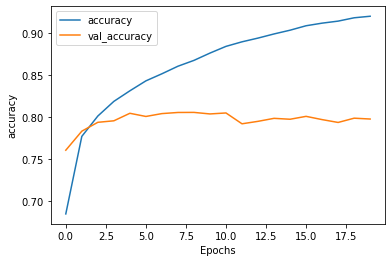

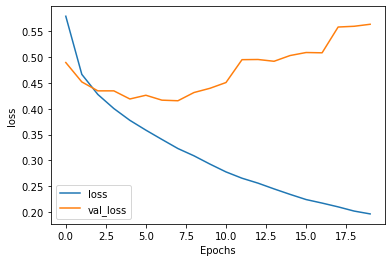

In [22]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [23]:
!mkdir -p saved_model
model.save('saved_model_naver/my_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model_naver/my_model/assets
